# Unsupervised Text Mining - Class Exercise (TAU Text Mining for Business, 24'/25')

## Dataset

In [1]:
import io
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/susanli2016/PyCon-Canada-2019-NLP-Tutorial/master/bbc-text.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
# df = pd.read_csv('bbc-text.csv')  # use this line instead if you've downloaded the dataset directly

In [2]:
df.shape

(2225, 2)

In [3]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

## 0 - Preprocessing

### Q1: Perform basic preprocessing

Write a function that receives a dataframe of the schema `["category", "text"]` stems and tokenize the texts, possibly also removing stopwrds, and returns a joined list of all tokens (not unique!) appearing in the input corpus.
Meaning, if a tokenized sentence is a list of tokens, you are required to join these lists together.

You can use the following code for that
```python
import itertools
all_words = list(itertools.chain.from_iterable(sentences))
```

In [5]:
import itertools
from typing import List

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

STOP_WORDS = stopwords.words('english') + ['said', 'year']
TOKENIZER = nltk.RegexpTokenizer(r"\w+")

def extract_token_list(df: pd.DataFrame) -> List[str]:
    snowball_stemmer = SnowballStemmer('english')
    def word_stemming(sent):
      return([snowball_stemmer.stem(word) for word in sent])
    def remove_stopwords(sent):
      return([word for word in sent if word not in STOP_WORDS ])
    sentences = [word_stemming(remove_stopwords(TOKENIZER.tokenize(sent.lower()))) for sent in df['text']]
    all_words = list(itertools.chain.from_iterable(sentences))
    # processed_corpus = [' '.join(sent) for sent in sentences]
    return all_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shaypalachy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
all_words = extract_token_list(df)

### Q2: How many tokens is the corpus composed of?

In [7]:
len(all_words)

495375

## 1 - Words Frequencies

### Q3: Use nltk's FreqDist to display the top 20 and top 40 frequent words in the corpus
https://www.nltk.org/api/nltk.probability.FreqDist.html

In [8]:
from nltk.probability import FreqDist

In [9]:
text_freq = FreqDist(all_words)
text_freq.tabulate(20)

    mr  would   also  peopl    new     us    one   time   game    say    use  could   make   last  first    two   like govern     go  world 
  3005   2581   2156   2046   1978   1972   1938   1667   1664   1590   1571   1511   1423   1417   1363   1282   1266   1254   1242   1229 


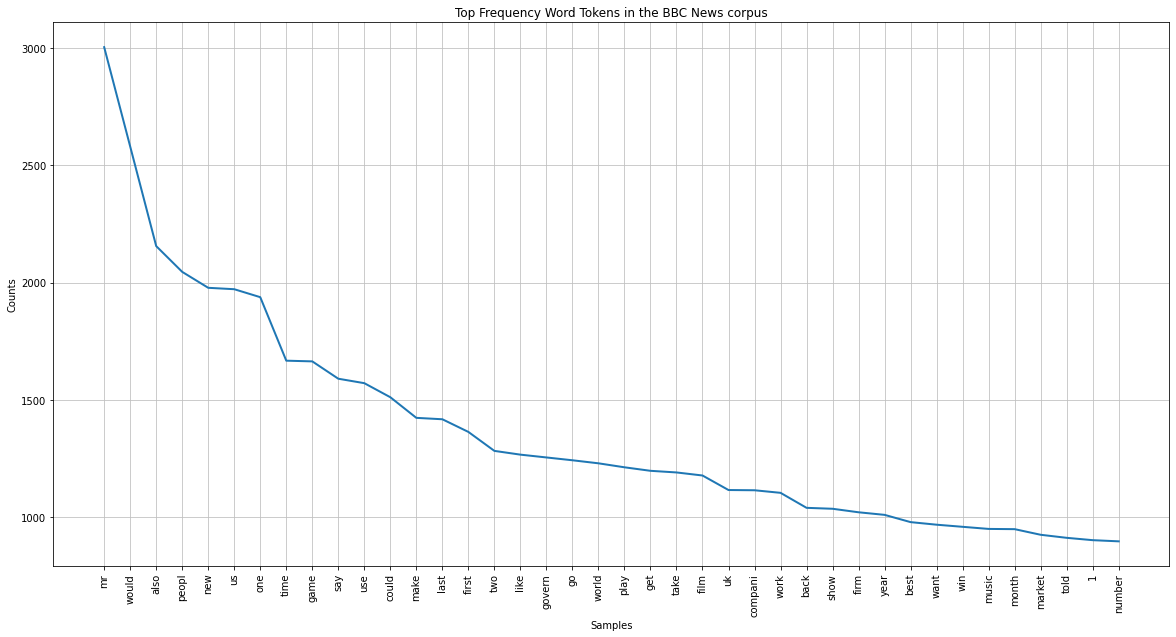

<AxesSubplot:title={'center':'Top Frequency Word Tokens in the BBC News corpus'}, xlabel='Samples', ylabel='Counts'>

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
text_freq.plot(40, title="Top Frequency Word Tokens in the BBC News corpus")

### Q4: Display top 20 frequent words for each category separately

In [11]:
for cat in df['category'].unique():
    print(f"For category ||{cat}|| top 20 most frequent words are:")
    subdf = df[df['category'] == cat]
    cat_words = extract_token_list(subdf)
    cat_text_freq = FreqDist(cat_words)
    cat_text_freq.tabulate(20)
    print("------------------\n")

For category ||tech|| top 20 most frequent words are:
      use     peopl      game technolog     mobil       one     phone      also       new    servic        mr      user     would     could      like      make    comput       get       net      firm 
     1014       961       889       631       622       555       542       537       517       515       509       476       471       469       468       467       465       438       398       397 
------------------

For category ||business|| top 20 most frequent words are:
     us compani      mr    firm  market   would    bank    also       1     new    sale   share   price  growth economi  govern    last   month  econom  expect 
    828     628     600     560     548     464     459     440     430     417     416     400     396     385     383     373     370     354     335     334 
------------------

For category ||sport|| top 20 most frequent words are:
   game    play     win    time   first  player england    back   wou

### Q5: Word Frequencies Bar Plots

Given an `nltk.FreqDist` object already initialized with a corpus, and thus populated with word frequencies, write a function that receives such an object and an int n, and prints a barplot of the top `n` most frequent words (on the X axis) and their frequencies (Y axis).

**HINT: ChatGPT exists, you know...**

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from nltk import FreqDist

def plot_top_n_words(freq_dist: FreqDist, n: int):
    # Get the top n most common words and their frequencies
    common_words = freq_dist.most_common(n)
    
    # Create a DataFrame from the common_words list
    df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    
    # Set the plot size
    plt.figure(figsize=(12, 6))
    
    # Create a barplot using seaborn
    sns.barplot(x='Word', y='Frequency', data=df, palette='viridis')
    
    # Customize the plot
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    
    # Display the plot
    plt.show()

For category ||tech|| top 20 most frequent words are:


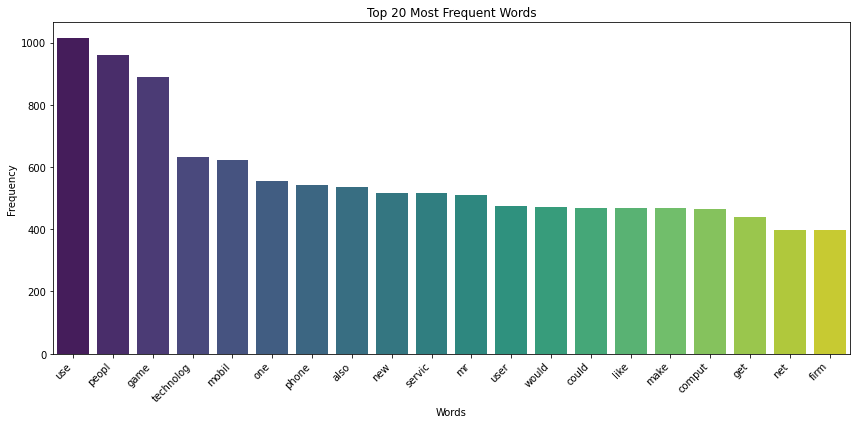



For category ||business|| top 20 most frequent words are:


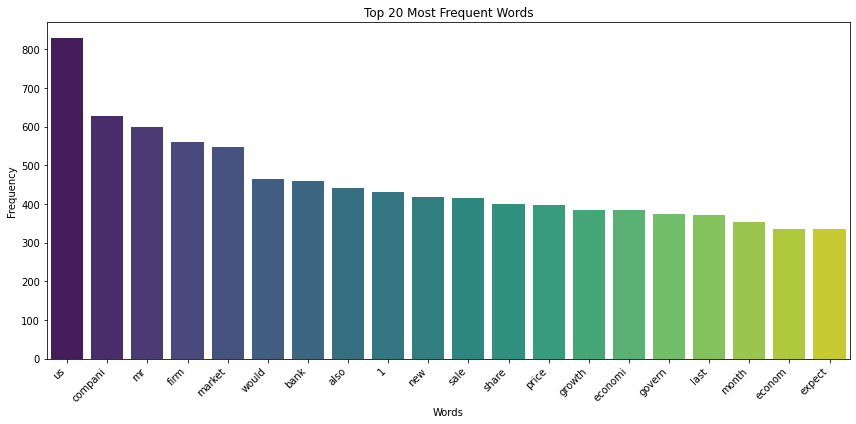



For category ||sport|| top 20 most frequent words are:


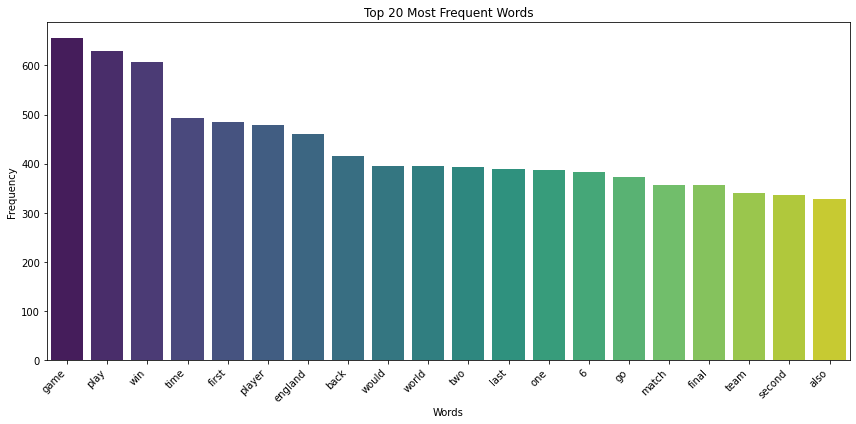



For category ||entertainment|| top 20 most frequent words are:


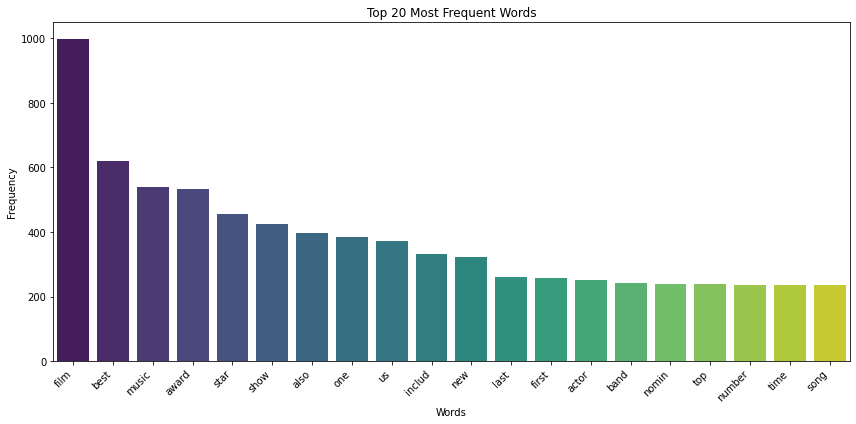



For category ||politics|| top 20 most frequent words are:


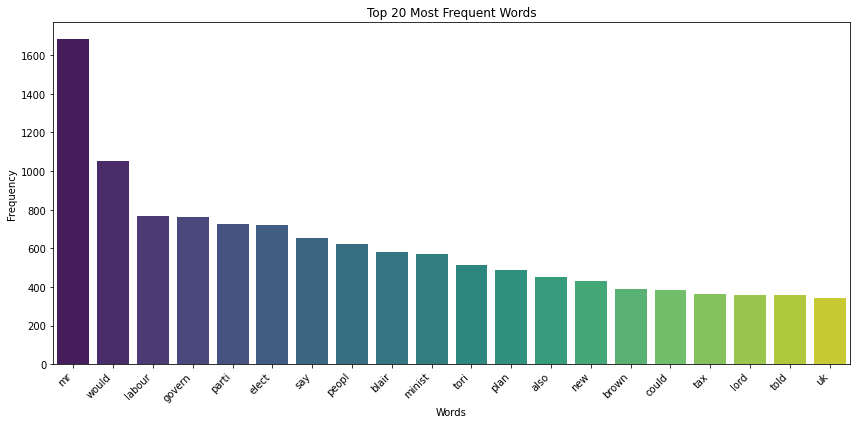

In [13]:
for cat in df['category'].unique():
    print(f"For category ||{cat}|| top 20 most frequent words are:")
    subdf = df[df['category'] == cat]
    cat_words = extract_token_list(subdf)
    cat_text_freq = FreqDist(cat_words)
    plot_top_n_words(cat_text_freq, 20)
    print("\n")

## 2 - Word Clouds

In [14]:
!pip install wordcloud
!pip install --upgrade Pillow

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Q6: Plotting word clouds

Write a function that given a word list prints a word cloud, using the `wordcloud` Python package.
Use it to print a word cloud for each category.

In [16]:
from collections import Counter

def plot_word_cloud(word_list: List[str], topic_name: str) -> None:
    word_freq = Counter(word_list)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(topic_name)
    plt.show()

For category ||tech|| this is the top frequent words cloud:


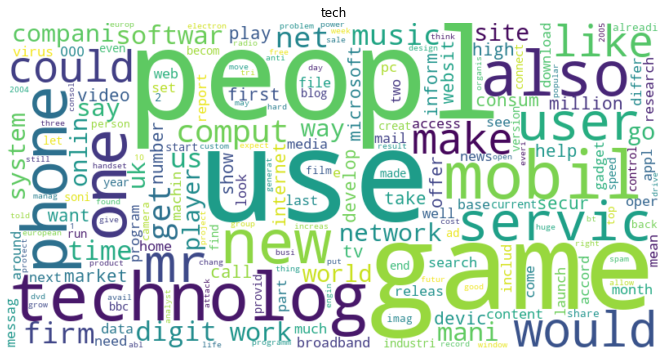



For category ||business|| this is the top frequent words cloud:


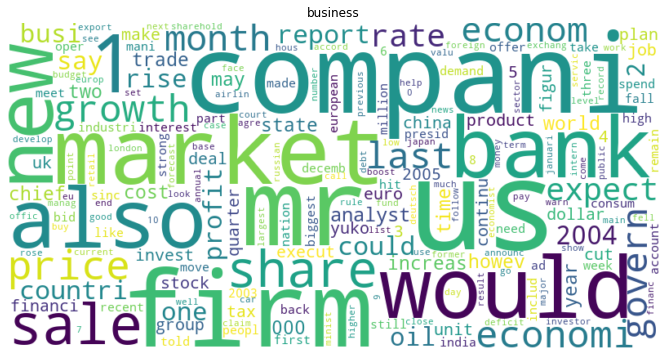



For category ||sport|| this is the top frequent words cloud:


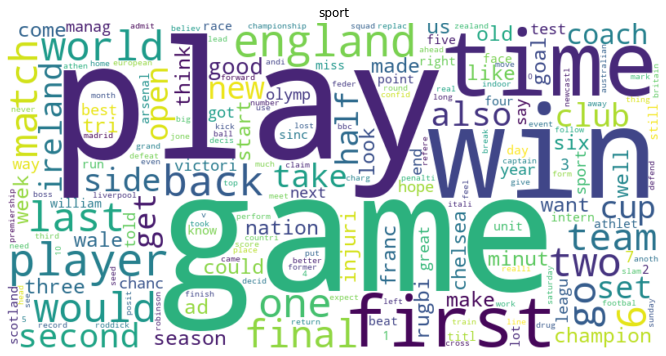



For category ||entertainment|| this is the top frequent words cloud:


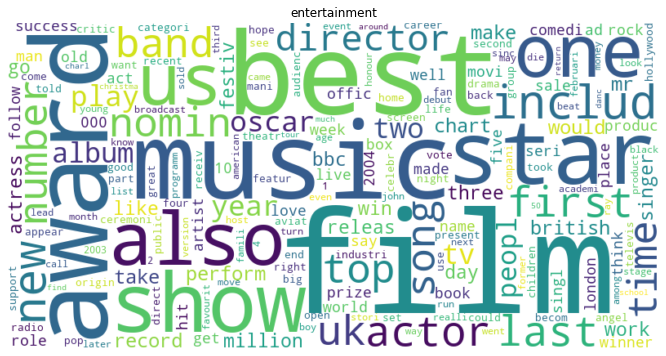



For category ||politics|| this is the top frequent words cloud:


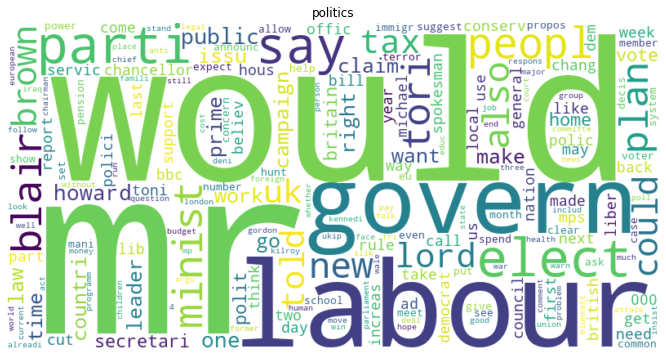

In [17]:
for cat in df['category'].unique():
    print(f"For category ||{cat}|| this is the top frequent words cloud:")
    subdf = df[df['category'] == cat]
    cat_words = extract_token_list(subdf)
    plot_word_cloud(cat_words, cat)
    print("\n")

## 3 - Clustering

### Q7: Adapt our preprocessing

Adapt `extract_token_list` into `extract_sentence_list`, returning a list of strings instead, where each sentene is a single string (after stemming, tokenization, stopwords removal, etc.)

In [18]:
from typing import List

STOP_WORDS = stopwords.words('english') + ['said', 'year']
TOKENIZER = nltk.RegexpTokenizer(r"\w+")

def extract_sentence_list(df: pd.DataFrame) -> List[str]:
    snowball_stemmer = SnowballStemmer('english')
    def word_stemming(sent):
      return([snowball_stemmer.stem(word) for word in sent])
    def remove_stopwords(sent):
      return([word for word in sent if word not in STOP_WORDS ])
    sentences = [word_stemming(remove_stopwords(TOKENIZER.tokenize(sent.lower()))) for sent in df['text']]
    processed_corpus = [' '.join(sent) for sent in sentences]
    return processed_corpus

### Q8: Focus our problem on Sport vs Politics

Assign the `bidf` variable with a sub-dataframe containing articles from only the `"sport"` and `"politics"` categories.

Then, procees it using `extract_sentence_list` and save it in `bi_sent_list`.

In [19]:
bidf = df[df['category'].isin(['sport', 'politics'])]
print(len(bidf))
bidf['category'].unique()

928


array(['sport', 'politics'], dtype=object)

In [20]:
bi_sent_list = extract_sentence_list(bidf)

### Q9: Get a BoW representation of our binary corpus

You may use a naive BoW representation, or TF-IDF.

**Hint: Look at the bottom of the following page:**

https://scikit-learn.org/1.5/api/sklearn.feature_extraction.html#module-sklearn.feature_extraction.text

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))
BOW = vectorizer.fit_transform(bi_sent_list)

### Q10: KMeans Clustering

Cluster the bi-category corpus using k-mens++ w/ Euclidean distance, into 2 clusters.

**Hint: Look at the following class, and consider carefully the initialization parameters.**
https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=1234)
cluster_assignments = kmeans.fit(BOW).labels_

### Q11: Compare clusters to categories

Find a way to check if the clusters match the categories closely or not.

In [23]:
topic_df = pd.DataFrame({"cluster": cluster_assignments, "real_category": bidf['category']})

<AxesSubplot:>

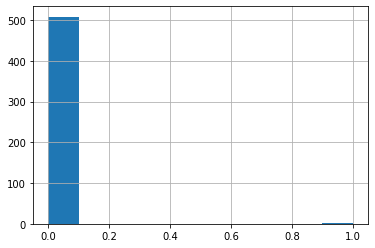

In [24]:
topic_df[topic_df['real_category'] == 'sport']['cluster'].hist()

<AxesSubplot:>

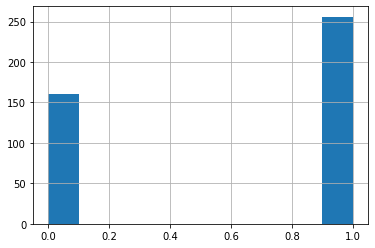

In [25]:
topic_df[topic_df['real_category'] == 'politics']['cluster'].hist()

array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

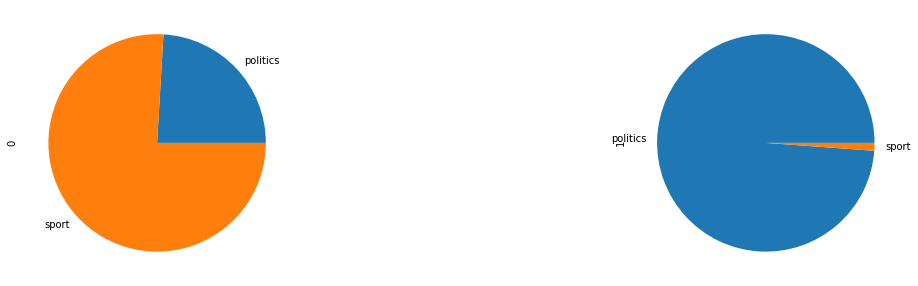

In [26]:
topic_df.groupby(['real_category', 'cluster'])['cluster'].count().unstack().plot.pie(subplots=True,figsize=(20, 5), legend=False)

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster_to_category_confusion(topic_df: pd.DataFrame) -> None:
    temp_df = topic_df.copy(deep=True)
    temp_df['real_category'] = pd.Categorical(temp_df['real_category']).codes
    conf_matrix = confusion_matrix(temp_df['real_category'], temp_df['cluster'])
    
    # Plot using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Cluster 0', 'Cluster 1'], 
                yticklabels=topic_df['real_category'].unique())
    plt.xlabel('Cluster')
    plt.ylabel('Real Category')
    plt.title('Confusion Matrix between Real Category and Cluster')
    plt.show()

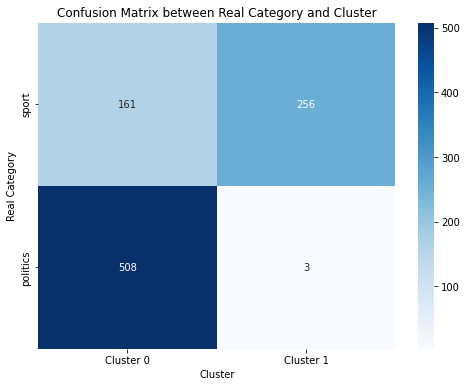

In [28]:
plot_cluster_to_category_confusion(topic_df)

### Q12: KMeans++ w/ Cosine Similarity

Cluster using KMeans++ again, this time using cosine similarity instead of Euclidean distance.

**Hint: Look at the `KMeans.fit` method, and the following sklearn function:**
https://scikit-learn.org/dev/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(BOW)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=1234)
cluster_assignments = kmeans.fit(similarity_matrix).labels_
# cluster_assignments

### Q13: Is it better?

Use the evaluation method you created before to compare the level of coherence of clusetring using cosine similarity with that achieved when using Euclidean distance.

In [30]:
topic_df = pd.DataFrame({"cluster": cluster_assignments, "real_category": bidf['category']})

<AxesSubplot:>

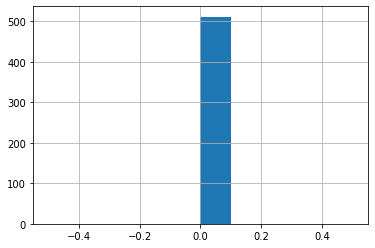

In [31]:
topic_df[topic_df['real_category'] == 'sport']['cluster'].hist()

<AxesSubplot:>

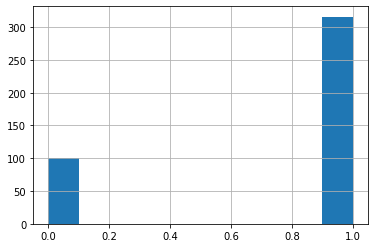

In [32]:
topic_df[topic_df['real_category'] == 'politics']['cluster'].hist()

array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

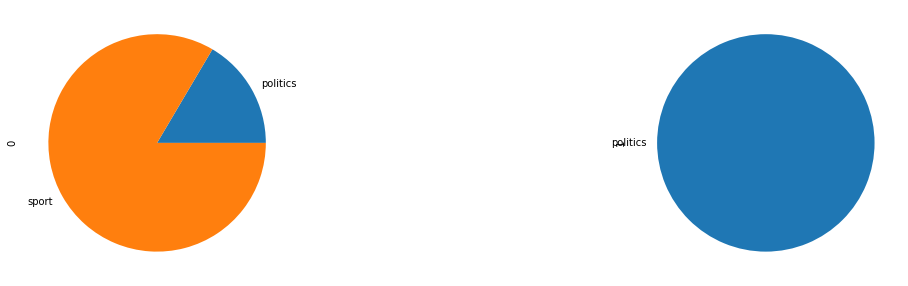

In [33]:
topic_df.groupby(['real_category', 'cluster'])['cluster'].count().unstack().plot.pie(subplots=True,figsize=(20, 5), legend=False)

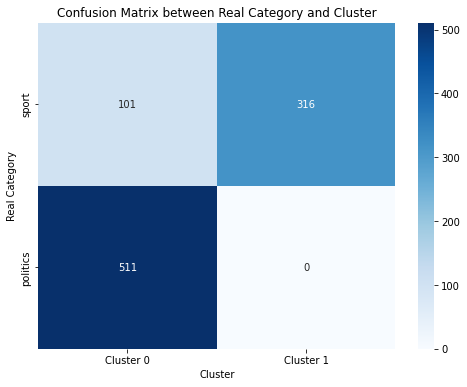

In [34]:
plot_cluster_to_category_confusion(topic_df)

## 4 - LDA (Bonus)

In [35]:
from sklearn.decomposition import LatentDirichletAllocation

In [36]:
## Run LDA
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=1234)
lda.fit(BOW)

LatentDirichletAllocation(n_components=5, random_state=1234)

In [37]:
# Assign training documents to topics
doc_topic = lda.transform(BOW)

# Get the topic with the highest probability for each document
topic_assignments = doc_topic.argmax(axis=1)
# topic_assignments

In [38]:
bidf.head()

,category,text
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...


<AxesSubplot:xlabel='topic'>

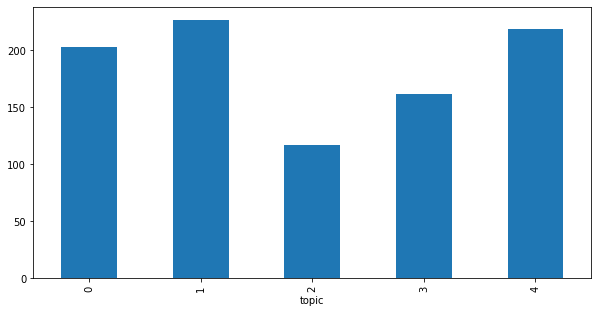

In [39]:
category_df = pd.DataFrame({"real_category": bidf.category, "topic": topic_assignments, "text": [" ".join(sentence) for sentence in bi_sent_list]})
category_df.groupby(['topic'])['topic'].count().plot(kind = 'bar', figsize=(10, 5))

In [43]:
topic_df.head()

,cluster,real_category
2,0,sport
3,0,sport
5,1,politics
6,1,politics
7,0,sport


array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

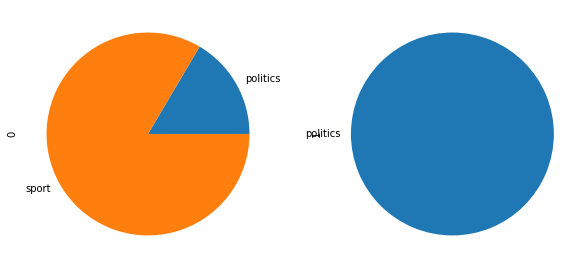

In [44]:
topic_df.groupby(['real_category', 'cluster'])['cluster'].count().unstack().plot.pie(subplots=True,figsize=(10, 5), legend=False)

In [45]:
## analyze output
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic_{topic_idx} = ", end="")
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]  # Indices of the top words in the topic
    top_features = [(feature_names[i], topic[i] / topic.sum()) for i in top_features_ind]
    top_words = [f"{weight:.3f}*{term}" for term, weight in top_features]
    print(" + ".join(top_words))

Topic_0 = 0.003*mr + 0.003*would + 0.002*win + 0.002*england + 0.002*first + 0.001*game + 0.001*back + 0.001*time + 0.001*play + 0.001*wale
Topic_1 = 0.002*play + 0.002*game + 0.002*time + 0.002*win + 0.002*world + 0.002*player + 0.002*two + 0.002*one + 0.002*last + 0.002*would
Topic_2 = 0.002*play + 0.002*win + 0.001*time + 0.001*second + 0.001*first + 0.001*player + 0.001*england + 0.001*game + 0.001*one + 0.001*match
Topic_3 = 0.003*would + 0.002*govern + 0.002*mr + 0.002*lord + 0.002*say + 0.002*also + 0.001*time + 0.001*new + 0.001*one + 0.001*first
Topic_4 = 0.008*mr + 0.005*would + 0.004*parti + 0.004*elect + 0.004*labour + 0.003*say + 0.003*govern + 0.003*peopl + 0.002*tax + 0.002*tori


In [46]:
import numpy as np
fuzzy_df = pd.DataFrame(np.round(doc_topic,2), columns=["Topic 0", "Topic 1", "Topic 2", "Topic 3", "Topic 4"])
fuzzy_df

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
0,1.0,0.00,0.0,0.0,0.00
1,0.0,0.00,1.0,0.0,0.00
2,0.8,0.00,0.0,0.0,0.20
3,0.0,0.00,0.0,0.0,1.00
4,0.0,1.00,0.0,0.0,0.00
...,...,...,...,...,...
923,0.0,0.68,0.0,0.0,0.32
924,0.0,0.00,1.0,0.0,0.00
925,0.0,0.00,0.0,0.0,1.00
926,0.0,0.00,0.0,1.0,0.00


In [47]:
fuzzy_df.corr()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
Topic 0,1.000000,-0.313557,-0.203680,-0.239732,-0.312496
Topic 1,-0.313557,1.000000,-0.226450,-0.270369,-0.282507
Topic 2,-0.203680,-0.226450,1.000000,-0.173591,-0.200330
Topic 3,-0.239732,-0.270369,-0.173591,1.000000,-0.252906
Topic 4,-0.312496,-0.282507,-0.200330,-0.252906,1.000000
